In [84]:
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import plot_tree
from sklearn import tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
#pip install decision-tree-id3
from id3 import Id3Estimator
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import pandas as pd

In [85]:
# Set random state for project
RD_STATE = 1

# Load breast cancer dataset
bc_data = load_breast_cancer()

# Pisahkan menjadi training set (80%) dan testing set (20%)
bc_X_train, bc_X_test, bc_y_train, bc_y_test = train_test_split(bc_data.data, bc_data.target, test_size=0.2, random_state=RD_STATE)

In [86]:
# Load play tennis dataset
pt_df_raw = pd.read_csv("play_tennis.csv")
pt_df = pt_df_raw.copy()

# Label encoding
le = LabelEncoder()
pt_classes = {}
for column in pt_df.columns:
    le.fit(pt_df[column])
    pt_df[column] = le.transform(pt_df[column])
    pt_classes[column] = le.classes_
pt_X_train, pt_X_test, pt_y_train, pt_y_test = train_test_split(pt_df[['outlook', 'temp', 'humidity', 'wind']], pt_df[['play']], test_size=0.2, random_state=RD_STATE)
# Lo

In [87]:
# DecisionTreeClassifier

# Fit classifier
bc_dtc_clf = tree.DecisionTreeClassifier().fit(bc_X_train, bc_y_train)

pt_dtc_clf = tree.DecisionTreeClassifier().fit(pt_X_train, pt_y_train)

# Print accuracy dan nilai f1

print("DecisionTreeClassifier:")
print("• Breast cancer dataset")
print("\tAccuracy: ", bc_dtc_clf.score(bc_X_test, bc_y_test))
print("\tf1_score: ", f1_score(bc_y_test, bc_dtc_clf.predict(bc_X_test)))
print("• Play tennis dataset")
print("\tAccuracy: ", pt_dtc_clf.score(pt_X_test, pt_y_test['play']))
print("\tf1_score: ", f1_score(pt_y_test['play'], pt_dtc_clf.predict(pt_X_test)))

DecisionTreeClassifier:
• Breast cancer dataset
	Accuracy:  0.9210526315789473
	f1_score:  0.9387755102040817
• Play tennis dataset
	Accuracy:  0.6666666666666666
	f1_score:  0.6666666666666666


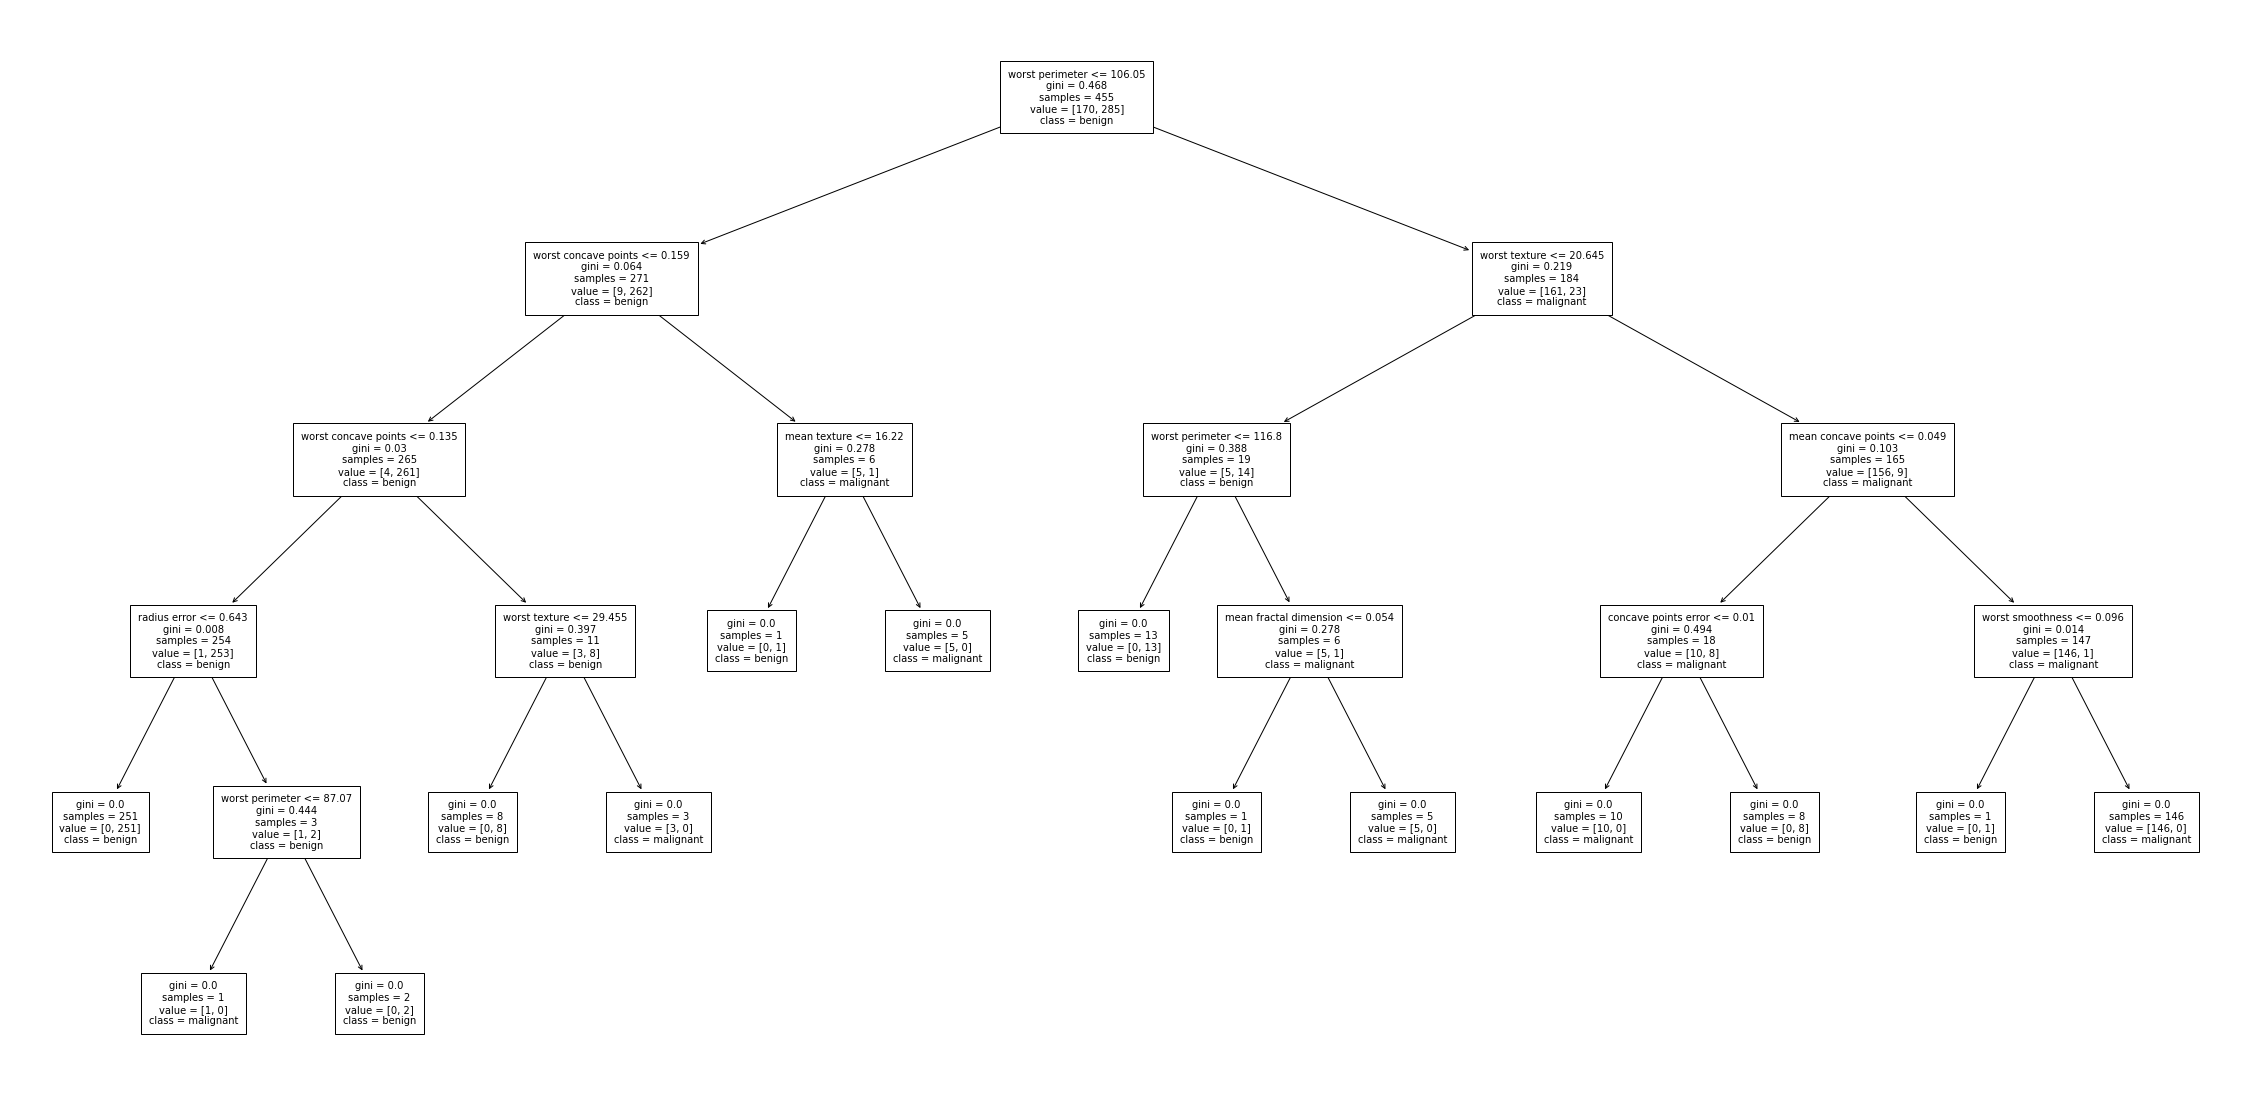

In [88]:
#tree modelling using plot_tree
bc_fn = load_breast_cancer().feature_names
bc_cn = load_breast_cancer().target_names

plt.figure(figsize=(40,20) )
plt.rcParams['font.size'] = '5'
bc_plt = tree.plot_tree(bc_dtc_clf ,feature_names=bc_fn , class_names = bc_cn)


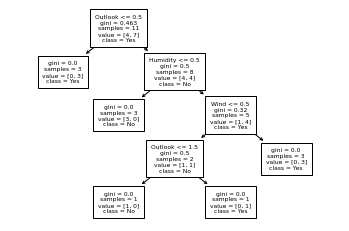

In [89]:
#tree modelling using plot_tree
pt_plt = tree.plot_tree(pt_dtc_clf ,feature_names=['Outlook','Temprature','Humidity','Wind'] , class_names=['No','Yes'])


In [90]:

# Id3Estimator

# Fit classifier
bc_id3_clf = Id3Estimator().fit(bc_X_train, bc_y_train)

pt_id3_clf = Id3Estimator().fit(pt_X_train, pt_y_train)

# Print accuracy dan nilai f1


print("DecisionTreeClassifier:")
print("• Breast cancer dataset")
print("\tAccuracy: ", accuracy_score(bc_y_test, bc_id3_clf.predict(bc_X_test)))
print("\tf1_score: ", f1_score(bc_y_test, bc_id3_clf.predict(bc_X_test)))
print("• Play tennis dataset")
print("\tAccuracy: ", accuracy_score(pt_y_test, pt_id3_clf.predict(pt_X_test)))
print("\tf1_score: ", f1_score(pt_y_test, pt_id3_clf.predict(pt_X_test)))

DecisionTreeClassifier:
• Breast cancer dataset
	Accuracy:  0.9385964912280702
	f1_score:  0.953020134228188
• Play tennis dataset
	Accuracy:  0.6666666666666666
	f1_score:  0.6666666666666666


/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [91]:
from id3 import Id3Estimator, export_text
print(export_text(bc_id3_clf.tree_, bc_fn))
# print(export_text(pt_id3_clf.tree_, bc_fn))


worst perimeter <=105.15
|   worst concave points <=0.14
|   |   radius error <=0.64: 1 (249) 
|   |   radius error >0.64
|   |   |   mean radius <=12.27: 0 (1) 
|   |   |   mean radius >12.27: 1 (2) 
|   worst concave points >0.14
|   |   worst texture <=25.94: 1 (6) 
|   |   worst texture >25.94
|   |   |   mean compactness <=0.12
|   |   |   |   mean radius <=14.06: 1 (2) 
|   |   |   |   mean radius >14.06: 0 (1) 
|   |   |   mean compactness >0.12: 0 (5) 
worst perimeter >105.15
|   worst concave points <=0.15
|   |   worst texture <=19.91: 1 (13) 
|   |   worst texture >19.91
|   |   |   worst radius <=16.80
|   |   |   |   mean smoothness <=0.09: 1 (8) 
|   |   |   |   mean smoothness >0.09
|   |   |   |   |   smoothness error <=0.00: 1 (2) 
|   |   |   |   |   smoothness error >0.00: 0 (5) 
|   |   |   worst radius >16.80
|   |   |   |   worst concavity <=0.21
|   |   |   |   |   mean texture <=21.26: 1 (2) 
|   |   |   |   |   mean texture >21.26: 0 (2) 
|   |   |   |   worst

In [92]:
print(export_text(pt_id3_clf.tree_, feature_names=['Outlook','Temprature','Humidity','Wind'] ))


Outlook <=0.50: 1 (3) 
Outlook >0.50
|   Humidity <=0.50: 0 (3) 
|   Humidity >0.50
|   |   Wind <=0.50
|   |   |   Temprature <=1.00: 0 (1) 
|   |   |   Temprature >1.00: 1 (1) 
|   |   Wind >0.50: 1 (3) 



In [93]:
# K Means
from sklearn.cluster import KMeans
# Fit classifier
bc_km_clf = KMeans(random_state=RD_STATE).fit(bc_X_train, bc_y_train)

pt_km_clf = KMeans(random_state=RD_STATE).fit(pt_X_train, pt_y_train)

# Print accuracy dan nilai f1


print("DecisionTreeClassifier:")
print("• Breast cancer dataset")
print("\tAccuracy: ", accuracy_score(bc_y_test, bc_km_clf.predict(bc_X_test)))
# print("\tAccuracy: ", bc_km_clf.score(bc_X_test, bc_y_test))
# print("\tf1_score: ", f1_score(bc_y_test, bc_km_clf.predict(bc_X_test)))
print("• Play tennis dataset")
print("\tAccuracy: ", accuracy_score(pt_y_test, pt_km_clf.predict(pt_X_test)))
# print("\tAccuracy: ", pt_km_clf.score(pt_X_test, pt_y_test['play']))
# print("\tf1_score: ", f1_score(pt_y_test, pt_km_clf.predict(pt_X_test)))


DecisionTreeClassifier:
• Breast cancer dataset
	Accuracy:  0.3333333333333333
• Play tennis dataset
	Accuracy:  0.6666666666666666
